In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'RLC sottosmorzato.csv'
fr = pd.read_csv(FILE)

In [2]:
t = np.array(fr['t (us)']) * 10**-6
V = np.array(fr['V (mV)']) * 10**-3
sigmaV = 0.04 / np.sqrt(12)

In [3]:
def VR_sottosmorzato(t,V0,γ,β):
    return V0*np.exp(-γ*t)*np.sin(β*t)

   
Parameters: [5.05427534e-01 1.05276247e+03 1.07545385e+04] 
Sigma parameters: [3.03331689e-03 1.16514706e+01 9.42935173e+00]

sigmaY: 0.011547005383792516

chiquadro ridotto: 0.53
df: 106
pvalue: 100.0%
covariance matrix: [[ 8.70150352e-06  2.51274508e-02 -2.46202665e-05]
 [ 2.51274508e-02  1.28386754e+02  5.01376991e+00]
 [-2.46202665e-05  5.01376991e+00  8.40857509e+01]]    



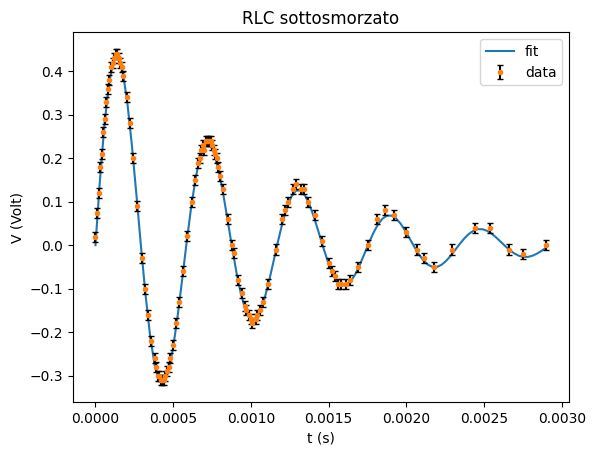

In [4]:
C =  104.7* 10**-9 # ± 0.3)e-9 F
sigmaC = 0.3 * 10**-9 # F

R = 60 # TODO: capire l'incertezza sul valore di questa resistenza
sigmaR = 0.01 * R # Ohm

L = 83.9 * 10**-3 #Hr
sigmaL = 0.3* 10**-3 #Hr

# VALORI ATTESI: # TODO: verificare che siano giusti propagazione errori
w2 = 1 / (L*C)
sigmaw2 = np.abs(1/(L*C))*np.sqrt((sigmaL/L)**2 + (sigmaC/C)**2)

γ = R / (2*L)
dγ_dR = 1 / (2 * L)
dγ_dL = -R / (2 * L**2)
sigmaγ = np.sqrt((dγ_dR * sigmaR)**2 + (dγ_dL * sigmaL)**2)

β = np.sqrt(w2 - γ**2)
dβ_dw = 0.5 / np.sqrt(w2 - γ**2)
dβ_dγ = -γ / np.sqrt(w2 - γ**2)
sigmaβ = np.sqrt((dβ_dw * sigmaw2)**2 + (dβ_dγ * sigmaγ)**2)

#####################################################################

i = Interpolazione(t,V,VR_sottosmorzato,sigmaV,p0=[3.96,γ,β])
print(i)

plt.title('RLC sottosmorzato')
plt.plot(i.x_best,i.y_best,label='fit')
plt.errorbar(t, V, yerr=sigmaV, fmt='.',linestyle='None',ecolor='black',capsize=2,label='data')
plt.xlabel('t (s)')
plt.ylabel('V (Volt)')
plt.legend()
plt.show()

In [5]:
print('γ = ',final_val(γ,sigmaγ,decimals=0))
print('β = ',final_val(β,sigmaβ,decimals=2,exp=3))
print('w2 = ',final_val(w2,sigmaw2,exp=6))

γ =  358.0 ± 4.0 
β =  (10.66 ± 0.02)e3 
w2 =  (113.84 ± 0.52)e6 


### STIMA VALORI DI GAMMA E W

In [6]:
γ = i.bval[1]
sigmaγ = i.sigma_bval[1]
β = i.bval[2]
sigmaβ = i.sigma_bval[2]

w2 = β**2 + γ**2
dγ_dw2 = -2 * γ * dγ_dL
dβ_dw2 = 2 * β * dβ_dw
sigma_w2 = np.sqrt((dγ_dw2 * sigmaγ)**2 + (dβ_dw2 * sigmaβ)**2)

print('γ = ',final_val(γ,sigmaγ,decimals=0))
print('β = ',final_val(β,sigmaβ,decimals=2,exp=3))
print('w2 = ',final_val(w2,sigmaw2,exp=6))

γ =  1053.0 ± 12.0 
β =  (10.75 ± 0.01)e3 
w2 =  (116.77 ± 0.52)e6 
